## Histograma en Python Puro

In [2]:
x = (0,1,1,1,2,2,3,7,7,7,25)
x

(0, 1, 1, 1, 2, 2, 3, 7, 7, 7, 25)

In [7]:
def count_elements(seq) -> dict:
    """
        Funcion que cuenta las frecuencias de aparicion de cada elemento de la secuencia, 
        crenado un diccionario como si fuese una tabla de frecuencias
    """
    histogram = {}
    for i in seq:
        # con get si encuentra el dato lo retorna, en caso contrario devuelve el valor por default
        # Cuando encuentra el indice, lo que hace es sumarle  + 1
        histogram[i] = histogram.get(i, 0) + 1
    return histogram

    

In [8]:
# Frecuencia absoluta
count_elements(x)

{0: 1, 1: 3, 2: 2, 3: 1, 7: 3, 25: 1}

In [10]:
# Libreria de collections
from collections import Counter

In [11]:
valor_absoluto_con_libreria = Counter(x)
valor_absoluto_con_libreria

Counter({0: 1, 1: 3, 2: 2, 3: 1, 7: 3, 25: 1})

In [14]:
def ascii_histogram(seq) -> None:
    """
    Un histograma de frecuencias absolutas
    colocado en horizontal y con caracteres ASCII
    """
    frecuencias_absolutas = count_elements(seq=seq)
    # sorted ordenara la coleccion, en este caso el diccionario 
    for k in sorted(frecuencias_absolutas):
        # imprime el primero paramtro, seguido 5 espacios a la derecha
        # el segundo parametro sera la multiplicacion del sigo + por el numero obtenido en la llave valor
        print('{0:5d} {1}'.format(k, '+' * frecuencias_absolutas[k]))
    

In [13]:
ascii_histogram(x)

    0 +
    1 +++
    2 ++
    3 +
    7 +++
   25 +


In [15]:
import random
random.seed(2019)

In [ ]:
# Otra generacion de datos aletaroia

In [23]:
values = [1,2,3,5,7,8,9,10]
frecuencias = (random.randint(5,20) for _ in values)
list(frecuencias)

[18, 12, 18, 19, 7, 15, 6, 16]

In [19]:
data = []
for key , value in zip(values, frecuencias):
    # Pusheando a la lista 
    # el arreglo en la posicion, generara ese valor tantas veces al multiplicarlo por el value
    data.extend([key]*value)
data

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10]

In [20]:
ascii_histogram(data)

    1 +++++++++
    2 ++++++++++++
    3 ++++++++++++++++++++
    5 ++++++++++
    7 ++++++++++++
    8 ++++++++++++
    9 +++++++++++++++
   10 ++++++++++++++


## Histograma con Numpy

In [4]:
import numpy as np

In [26]:
# Seteando la semilla de los random
np.random.seed(2019)

In [27]:
# Definiendo a la libreria, algunos ajustes globales
# precision=3 // mostrara como maximo 3 decimales
np.set_printoptions(precision=3)

In [28]:
# usando laplace para generar numeros aletorios
x = np.random.laplace(loc=10, scale=3, size=1000)
x[:10]

array([14.935,  9.278, 10.855, 10.968, 14.294,  8.459, 11.555, 14.926,
       14.316,  9.373])

In [37]:
# np.histogram(x)
# np.histogram(coleccion de datos)
# devuelve 2 tuplas, el primer valor es el histograma (frecuencia de las divisiones) 
# y el segundo los extremos de las divisiones o intervalos
hist, bin_edges = np.histogram(x)
np.histogram(x)

(array([  1,   0,   0,   8,  48, 194, 542, 167,  31,   9], dtype=int64),
 array([-19.167, -14.642, -10.118,  -5.593,  -1.069,   3.455,   7.98 ,
         12.504,  17.029,  21.553,  26.077]))

In [32]:
hist.size, bin_edges.size

(10, 11)

In [38]:
# Emulando la distribucion que realiza automaticamente Numpy con la funcion histogram
# Obteniendo el minimo y el maximo
min_edge = x.min()
max_edge = x.max()
min_edge, max_edge

# Define la cantidad de divisiones
n_bins = 11

# Definiendo las divisiones con espaciados fijos
bin_edges_manual = np.linspace(start=min_edge, stop=max_edge, num=n_bins, endpoint=True)
bin_edges_manual


array([-19.167, -14.642, -10.118,  -5.593,  -1.069,   3.455,   7.98 ,
        12.504,  17.029,  21.553,  26.077])

In [39]:
# Comparando la el valor de la tupla generada por histogram vs la manual con numpy
# .array_equal(coleccion1, collecion2)
# Permite comparar si a nivel de data son lo mismo las coecciones
np.array_equal(bin_edges, bin_edges_manual)

True

## Visualizacion de Histogramas con Matplotlib y Pandas

In [40]:
import matplotlib.pyplot as plt

In [41]:
# usando laplace para generar numeros aletorios
x = np.random.laplace(loc=10, scale=3, size=1000)
x[:10]

array([ 6.845,  9.362,  9.985, 18.31 , 15.288, 11.093, 11.06 , 10.41 ,
       13.157, 10.088])

(array([  2.,   2.,   1.,   2.,   2.,   4.,   1.,   3.,   3.,  10.,   6.,
         11.,  20.,  28.,  44.,  58.,  74.,  71., 101., 150., 102.,  72.,
         50.,  51.,  38.,  25.,  13.,  24.,   6.,   5.,   6.,   2.,   3.,
          3.,   2.,   1.,   0.,   2.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   1.]),
 array([-7.648, -6.733, -5.817, -4.901, -3.985, -3.069, -2.153, -1.237,
        -0.321,  0.595,  1.511,  2.427,  3.343,  4.259,  5.175,  6.091,
         7.007,  7.923,  8.839,  9.755, 10.671, 11.587, 12.503, 13.419,
        14.335, 15.25 , 16.166, 17.082, 17.998, 18.914, 19.83 , 20.746,
        21.662, 22.578, 23.494, 24.41 , 25.326, 26.242, 27.158, 28.074,
        28.99 , 29.906, 30.822, 31.738, 32.654, 33.57 , 34.486]),
 <a list of 46 Patch objects>)

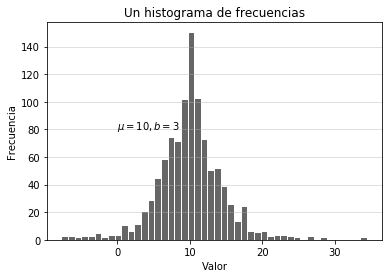

In [53]:
# plt.hist(x)
# plt.hist(Arreglo)
# devuelve 3 tuplas, 1 con cantidad de elementos o frecuencias de los elementos, 2 divisiones o extremos del intervalo, 3 patches
# .hist(x=data arregkim bins=tipo de divisiones, color="color en haxedecimal", alpha="tranparecia 0 a 1", rwidht="ancho de cada columna")
frecuencias, bins, patches = plt.hist(x=x, bins='auto', color='#333333', alpha= 0.75, rwidth=0.85)
# añadiendo rayas horizonales en el eje de las y
plt.grid(axis='y', alpha = 0.5)
# Etiquetas en los ejes
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
# Titulo y texto
plt.title('Un histograma de frecuencias')
plt.text(0,80, r'$\mu = 10, b = 3$') # .text(psicionx, pisiciony, 'texto')

frecuencias, bins, patches

In [ ]:
import pandas as pd

In [63]:
size , scale = 1000 , 10
# Generando una serie, de datos random con Numpy
data = pd.Series(np.random.gamma(scale, size=size))
data

0      12.542890
1       6.374123
2       6.062628
3      11.281843
4       9.333709
5       9.345968
6      10.476106
7      10.274608
8      10.589216
9       9.233375
10      8.153356
11     10.511433
12      7.127043
13      8.869547
14     13.422941
15      7.527213
16     10.433524
17     13.187047
18     10.040690
19     11.072461
20     10.372819
21     10.157363
22      8.233672
23     10.734760
24      9.593208
25     13.077856
26      8.141933
27      5.720931
28      9.568567
29     10.194593
         ...    
970     4.851830
971     7.562783
972     8.901284
973     6.682742
974     5.519744
975     9.063104
976    15.057978
977     7.750156
978     9.830913
979     8.552812
980    14.617241
981     8.403454
982     9.246176
983    13.653791
984    11.559880
985    12.553035
986    12.462773
987    11.072319
988     9.888904
989    13.968327
990     8.241070
991     8.397470
992    16.326565
993    14.728616
994    11.582069
995    13.184896
996    12.308561
997    16.4731

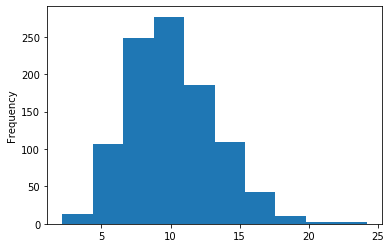

In [64]:
# Generando un histograma vacico con la data random, a partir de unsa serie de Pandas
data.plot.hist()

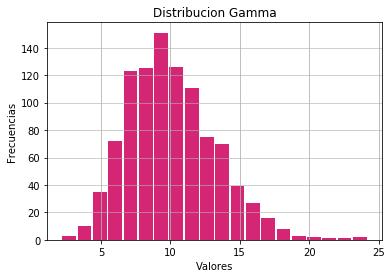

In [65]:
data.plot.hist(grid=True, bins=20, rwidth=0.9, color= "#d52675")
plt.title('Distribucion Gamma')
plt.xlabel('Valores')
plt.ylabel('Frecuencias')
plt.grid(axis='y', alpha=0.75)

## Funciones de densidad y de probabilidad

In [75]:
mu = 10, 20
sigma = 5, 2
dist = pd.DataFrame(np.random.normal(loc= mu, scale=sigma, size = (1000, 2)), columns =['x1', 'x2'])
dist.head()

,x1,x2
0,8.040956,18.323730
1,9.407498,21.117696
2,9.919120,20.510100
3,9.382617,20.003313
4,3.225706,22.353778


In [71]:
# mostrando el Df generando con describe, y redondeando sus resultado a 2 decimales
dist.describe().round(decimals=2)

,x1,x2
count,1000.00,1000.00
mean,10.00,20.12
std,4.88,2.07
min,-8.68,12.22
25%,6.89,18.82
50%,9.87,20.15
75%,13.36,21.59
max,23.53,26.47


In [72]:
# Agregando operaciones al dataframe de datos, manualmente emulando un describe
dist.aggregate(['min', 'max', 'mean', 'std']).round(decimals=2)

,x1,x2
min,-8.68,12.22
max,23.53,26.47
mean,10.00,20.12
std,4.88,2.07


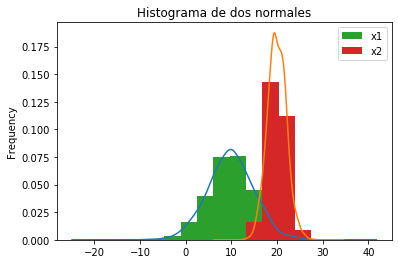

In [77]:
fig , ax = plt.subplots()
# kde => kernel density
# Permite generar una aproximacion de la distribucion
dist.plot.kde(ax=ax, legend=False, title='Histograma de dos normales')
dist.plot.hist(density=True, ax = ax)

## Histogramas con Seaborn

In [13]:
import seaborn as sb
import pandas as pd
import numpy as np


In [14]:
size , scale = 1000 , 10
# Generando una serie, de datos random con Numpy
data = pd.Series(np.random.gamma(scale, size=size))
data

0       9.622467
1      11.612568
2       8.086265
3       8.519376
4      16.176017
5       9.761637
6      11.000858
7      12.380536
8       5.658376
9      12.203156
10     13.337756
11      9.397348
12      3.450282
13      5.512784
14      9.061922
15      9.725927
16      4.615915
17      9.884216
18     11.781881
19     11.410799
20      5.089963
21     13.772962
22     13.054842
23     10.418797
24     16.728151
25     12.739045
26     15.074033
27     14.811818
28     12.627764
29     12.332276
         ...    
970    16.007199
971     6.269834
972     8.610609
973     7.129069
974    18.226160
975     9.758874
976     5.119244
977    16.240397
978     5.710786
979    17.921386
980     6.658157
981    10.482258
982    13.616609
983    12.505043
984     9.476721
985     4.907223
986    13.667626
987     6.247064
988    10.718135
989     9.019065
990     4.886705
991    11.112735
992     7.609382
993    10.312673
994    12.594204
995     8.288443
996     7.158022
997    10.0209

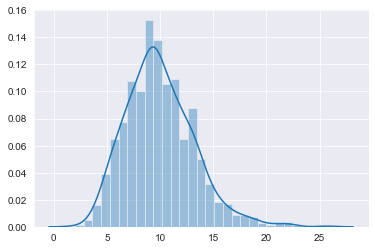

In [11]:
sb.set_style('darkgrid') # coloca un grid con background
sb.distplot(data)

## Otras formas

In [18]:
# .random.choice(arreglo posibles valores, cantidad, arreglo de probabilidades para cada uno de los posibles valores)
data2 = np.random.choice(np.arange(10), size = 1000, p = np.linspace(1,11,10) / 60)
data2


array([7, 2, 3, 7, 7, 4, 4, 8, 5, 4, 5, 6, 7, 9, 5, 1, 8, 7, 9, 9, 9, 2,
       3, 9, 8, 2, 7, 2, 4, 5, 4, 8, 8, 7, 8, 7, 8, 8, 4, 6, 5, 9, 9, 8,
       9, 6, 9, 6, 4, 9, 4, 6, 8, 2, 9, 3, 4, 3, 7, 3, 1, 3, 9, 8, 5, 4,
       4, 8, 9, 5, 2, 7, 9, 7, 8, 9, 9, 0, 3, 5, 9, 7, 4, 7, 6, 6, 3, 5,
       2, 7, 9, 9, 6, 6, 7, 9, 1, 7, 8, 3, 9, 9, 4, 4, 5, 4, 8, 3, 5, 4,
       9, 0, 7, 7, 7, 9, 7, 7, 9, 8, 4, 3, 9, 7, 8, 5, 8, 5, 7, 5, 6, 9,
       6, 6, 4, 5, 4, 2, 3, 7, 5, 9, 8, 6, 9, 2, 7, 7, 9, 9, 9, 6, 6, 7,
       5, 5, 5, 7, 9, 5, 6, 7, 8, 9, 4, 5, 9, 8, 5, 5, 8, 7, 6, 5, 2, 6,
       7, 8, 2, 7, 6, 6, 7, 8, 6, 5, 1, 2, 8, 6, 8, 7, 8, 9, 9, 5, 9, 6,
       2, 7, 1, 5, 7, 3, 9, 5, 5, 7, 3, 7, 7, 9, 5, 9, 6, 7, 6, 9, 4, 7,
       9, 9, 6, 4, 4, 6, 4, 6, 5, 9, 7, 6, 8, 4, 8, 8, 8, 6, 8, 2, 1, 5,
       3, 9, 3, 8, 5, 5, 8, 8, 9, 7, 9, 9, 4, 2, 9, 5, 3, 5, 8, 8, 3, 9,
       8, 6, 6, 3, 6, 2, 9, 8, 4, 6, 7, 6, 6, 8, 9, 9, 9, 9, 8, 2, 6, 7,
       2, 2, 8, 7, 1, 8, 5, 4, 8, 9, 1, 6, 4, 0, 2,

In [19]:
serie1 = pd.Series(data2)
serie1

0      7
1      2
2      3
3      7
4      7
5      4
6      4
7      8
8      5
9      4
10     5
11     6
12     7
13     9
14     5
15     1
16     8
17     7
18     9
19     9
20     9
21     2
22     3
23     9
24     8
25     2
26     7
27     2
28     4
29     5
      ..
970    8
971    4
972    3
973    5
974    9
975    0
976    2
977    9
978    6
979    6
980    1
981    9
982    2
983    7
984    8
985    7
986    5
987    6
988    9
989    6
990    7
991    4
992    8
993    8
994    6
995    9
996    7
997    4
998    5
999    5
Length: 1000, dtype: int32

In [20]:
# Otra forma de obtener la frecuencia absoluta
serie1.value_counts()

9    179
7    159
8    150
6    128
5    122
4     83
3     75
2     56
1     29
0     19
dtype: int64

In [21]:
# Otra forma de obtener la frencuencia relativa
serie1.value_counts(normalize=True)

9    0.179
7    0.159
8    0.150
6    0.128
5    0.122
4    0.083
3    0.075
2    0.056
1    0.029
0    0.019
dtype: float64